In [1]:
import numpy as np
import pandas as pd
from glmnet import GLMNetPath
from sklearn.base import clone
import statsmodels.api as sm
from ISLP.models import summarize
import logging
logging.basicConfig(filename='log.txt', level=logging.DEBUG)

import rpy2
%load_ext rpy2.ipython

   user  system elapsed 
  1.352   0.010   1.362 


Loaded lars 1.3

Loading required package: Matrix
Loaded glmnet 4.1-4


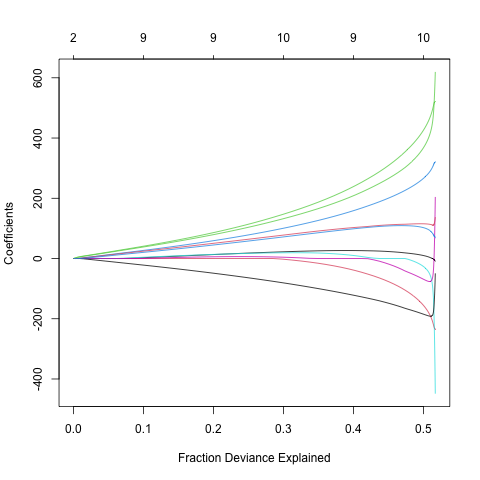

In [2]:
%%R -o X,Y,N
#install.packages('lars', repo='http://cloud.r-project.org')
library(lars)
library(glmnet)
data(diabetes)
X = model.matrix(lm(y ~ x, data=diabetes))[,-1]
N = colnames(diabetes$x)
Y = diabetes$y
plot(glmnet(X, Y, family=gaussian(), alpha=0.4), xvar='dev')
system.time(cv.glmnet(X, Y, family=gaussian(), 
                      alpha=0.4, nfolds=10))

In [3]:
X = pd.DataFrame(X, columns=N)
G = GLMNetPath(alpha=.4)
G.fit(X, Y)

GLMNetPath(lambda_values=array([1.00000000e+00, 9.11162756e-01, 8.30217568e-01, 7.56463328e-01,
       6.89261210e-01, 6.28029144e-01, 5.72236766e-01, 5.21400829e-01,
       4.75081016e-01, 4.32876128e-01, 3.94420606e-01, 3.59381366e-01,
       3.27454916e-01, 2.98364724e-01, 2.71858824e-01, 2.47707636e-01,
       2.25701972e-01, 2.05651231e-01, 1.87381742e-01, 1.70735265e-01,
       1.55567614e-01, 1.41747416e-01, 1.29154967e-01, 1.17681195e-01,
       1.07226722e-01, 9.77009957e-02, 8.90215085e-02, 8.11130831e-02,
       7.39072203e-02, 6.73415066e-02, 6.13590727e-02, 5.59081018e-02,
       5.09413801e-02, 4.64158883e-02, 4.22924287e-02, 3.85352859e-02,
       3.51119173e-02, 3.19926714e-02, 2.91505306e-02, 2.65608778e-02,
       2.42012826e-02, 2.20513074e-02, 2.00923300e-02, 1.83073828e-02,
       1.66810054e-02, 1.51991108e-02, 1.38488637e-02, 1.26185688e-02,
       1.14975700e-02, 1.04761575e-02, 9.54548457e-03, 8.69749003e-03,
       7.92482898e-03, 7.22080902e-03, 6.57933225e-03, 5.99484250e-03,
       5.46227722e-03, 4.97702356e-03, 4.53487851e-03, 4.13201240e-03,
       3.76493581e-03, 3.43046929e-03, 3.12571585e-03, 2.84803587e-03,
       2.59502421e-03, 2.36448941e-03, 2.15443469e-03, 1.96304065e-03,
       1.78864953e-03, 1.62975083e-03, 1.48496826e-03, 1.35304777e-03,
       1.23284674e-03, 1.12332403e-03, 1.02353102e-03, 9.32603347e-04,
       8.49753436e-04, 7.74263683e-04, 7.05480231e-04, 6.42807312e-04,
       5.85702082e-04, 5.33669923e-04, 4.86260158e-04, 4.43062146e-04,
       4.03701726e-04, 3.67837977e-04, 3.35160265e-04, 3.05385551e-04,
       2.78255940e-04, 2.53536449e-04, 2.31012970e-04, 2.10490414e-04,
       1.91791026e-04, 1.74752840e-04, 1.59228279e-04, 1.45082878e-04,
       1.32194115e-04, 1.20450354e-04, 1.09749877e-04, 1.00000000e-04]), lambda_fractional=True, alpha=0.4, lower_limits=-inf, upper_limits=inf, penalty_factor=None, fit_intercept=True, standardize=True, family=<statsmodels.genmod.families.family.Gaussian object at 0x1746c9c30>, control=GLMNetPathControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05))

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Coefficients ($\\beta$)'>

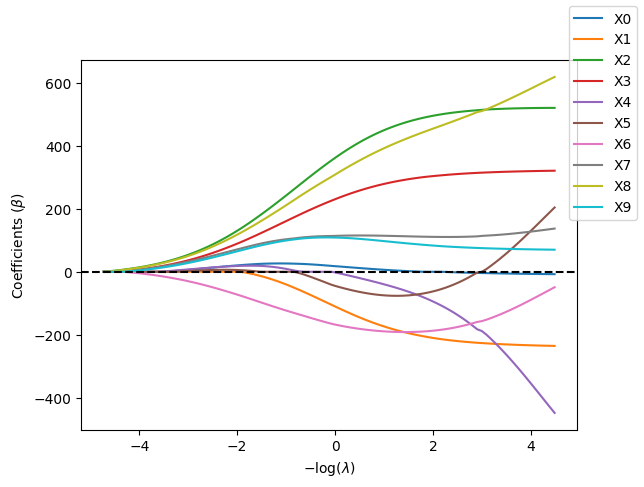

In [4]:
G.plot_coefficients(legend=True)

In [5]:
%%prun 
G.cross_validation_path(X, Y, cv=100, alignment='lambda')

         5648197 function calls (5363746 primitive calls) in 3.832 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10100    1.022    0.000    1.022    0.000 {built-in method glmnet.glmnetpp.wls}
   184305    0.203    0.000    0.203    0.000 {method 'reduce' of 'numpy.ufunc' objects}
196142/11110    0.169    0.000    0.351    0.000 copy.py:128(deepcopy)
    50500    0.140    0.000    0.392    0.000 family.py:145(deviance)
    10100    0.134    0.000    1.639    0.000 elnet.py:46(fit)
247313/165013    0.132    0.000    0.589    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    30400    0.132    0.000    0.138    0.000 base.py:60(_matvec)
    10100    0.114    0.000    2.691    0.000 irls.py:10(quasi_newton_step)
    10100    0.101    0.000    3.449    0.000 glm.py:180(fit)
    91601    0.068    0.000    0.205    0.000 fromnumeric.py:69(_wrapreduction)
      100    0.060    0.001    3.646   

In [6]:
#%%timeit
G.control.logging = True
G.cross_validation_path(X, Y, cv=50, alignment='lambda')

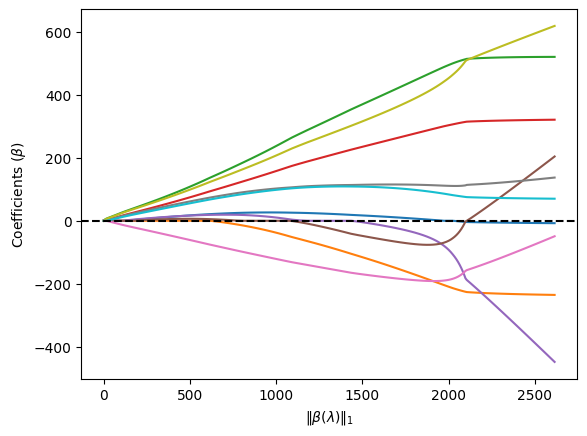

In [7]:
G.plot_coefficients(xvar='norm');

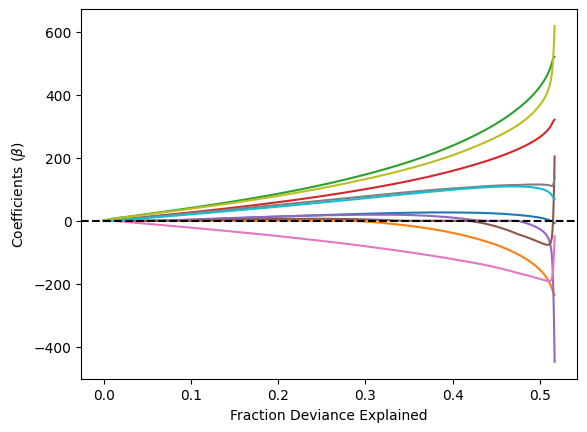

In [8]:
G.plot_coefficients(xvar='dev');

<Axes: xlabel='$-\\log(\\lambda)$'>

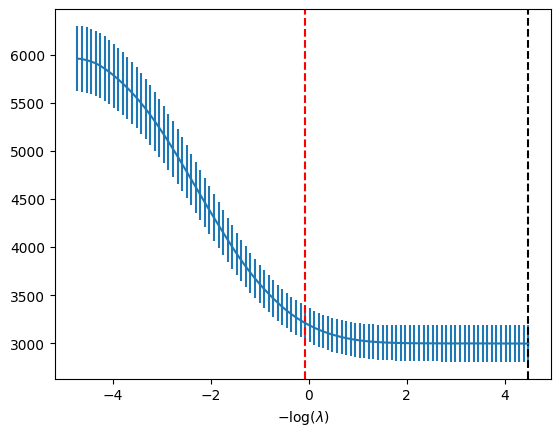

In [9]:
G.plot_cross_validation()

<Axes: xlabel='$-\\log(\\lambda)$'>

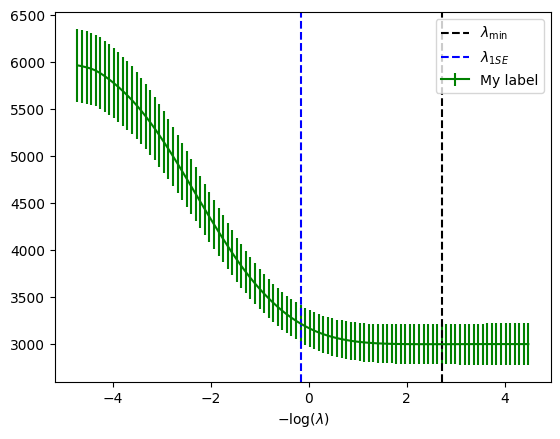

In [10]:
G2 = clone(G)
G2.fit(X, Y)
G2.cross_validation_path(X, Y, cv=10, alignment='fraction')
G2.plot_cross_validation(c='green', label='My label', legend=True, col_1se='blue')

In [11]:
yb = Y + np.random.standard_normal(Y.shape) > 140
X.insert(0, 'intercept', np.ones(Y.shape[0]))
glm = sm.GLM(yb,X,family=sm.families.Binomial())
results=glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.0064,0.126,-0.051,0.960
age,1.0876,2.792,0.390,0.697
sex,-10.5856,3.048,-3.473,0.001
bmi,12.9345,3.295,3.926,0.000
map,10.8714,3.089,3.519,0.000
tc,-34.8838,23.366,-1.493,0.135
ldl,25.4917,19.812,1.287,0.198
hdl,0.3965,11.318,0.035,0.972
tch,0.6590,8.098,0.081,0.935
ltg,31.0019,9.754,3.178,0.001


In [12]:
from glmnet import GLM, GLMNet

#G3 = GLMNetPath(alpha=.4,family=sm.families.Binomial())
G3 = GLM(family=sm.families.Binomial(), summarize=True)
G3.fit(X.drop(columns=['intercept']), yb)
G3.summary_

,coef,std err,t,P>|t|
intercept,-0.006404,0.126120,-0.050778,0.959503
age,1.087553,2.792047,0.389518,0.696893
sex,-10.585557,3.048147,-3.472784,0.000515
bmi,12.934526,3.294884,3.925639,0.000086
map,10.871445,3.088927,3.519489,0.000432
tc,-34.883759,23.365644,-1.492951,0.135450
ldl,25.491734,19.811649,1.286704,0.198197
hdl,0.396495,11.317732,0.035033,0.972053
tch,0.659028,8.098279,0.081379,0.935141
ltg,31.001903,9.753774,3.178452,0.001481


In [13]:
np.isnan(yb).sum()

0

In [14]:
G3 = GLMNet(family=sm.families.Binomial(), alpha=0.4, lambda_val=0.02081227758950013)
G3.fit(X.drop(columns=['intercept']), yb)
G3.coef_
G3.null_deviance_

612.7421076149917

In [15]:
G4 = GLMNetPath(family=sm.families.Binomial(), alpha=0.4 )
G4.fit(X.drop(columns=['intercept']), yb)


GLMNetPath(lambda_values=array([1.00000000e+00, 9.11162756e-01, 8.30217568e-01, 7.56463328e-01,
       6.89261210e-01, 6.28029144e-01, 5.72236766e-01, 5.21400829e-01,
       4.75081016e-01, 4.32876128e-01, 3.94420606e-01, 3.59381366e-01,
       3.27454916e-01, 2.98364724e-01, 2.71858824e-01, 2.47707636e-01,
       2.25701972e-01, 2.05651231e-01, 1.87381742e-01, 1.70735265e-01,
       1.55567614e-01, 1.41747416e-01, 1.29154967e-01, 1.17681195e-01,
       1.07226722e-01, 9.77009957e-02, 8.90215085e-02, 8.11130831e-02,
       7.39072203e-02, 6.73415066e-02, 6.13590727e-02, 5.59081018e-02,
       5.09413801e-02, 4.64158883e-02, 4.22924287e-02, 3.85352859e-02,
       3.51119173e-02, 3.19926714e-02, 2.91505306e-02, 2.65608778e-02,
       2.42012826e-02, 2.20513074e-02, 2.00923300e-02, 1.83073828e-02,
       1.66810054e-02, 1.51991108e-02, 1.38488637e-02, 1.26185688e-02,
       1.14975700e-02, 1.04761575e-02, 9.54548457e-03, 8.69749003e-03,
       7.92482898e-03, 7.22080902e-03, 6.57933225e-03, 5.99484250e-03,
       5.46227722e-03, 4.97702356e-03, 4.53487851e-03, 4.13201240e-03,
       3.76493581e-03, 3.43046929e-03, 3.12571585e-03, 2.84803587e-03,
       2.59502421e-03, 2.36448941e-03, 2.15443469e-03, 1.96304065e-03,
       1.78864953e-03, 1.62975083e-03, 1.48496826e-03, 1.35304777e-03,
       1.23284674e-03, 1.12332403e-03, 1.02353102e-03, 9.32603347e-04,
       8.49753436e-04, 7.74263683e-04, 7.05480231e-04, 6.42807312e-04,
       5.85702082e-04, 5.33669923e-04, 4.86260158e-04, 4.43062146e-04,
       4.03701726e-04, 3.67837977e-04, 3.35160265e-04, 3.05385551e-04,
       2.78255940e-04, 2.53536449e-04, 2.31012970e-04, 2.10490414e-04,
       1.91791026e-04, 1.74752840e-04, 1.59228279e-04, 1.45082878e-04,
       1.32194115e-04, 1.20450354e-04, 1.09749877e-04, 1.00000000e-04]), lambda_fractional=True, alpha=0.4, lower_limits=-inf, upper_limits=inf, penalty_factor=None, fit_intercept=True, standardize=True, family=<statsmodels.genmod.families.family.Binomial object at 0x29f271060>, control=GLMNetPathControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05))